# Упражнение на графах

**Дано**: [набор данных](https://drive.google.com/open?id=1O5pFvZEzzAk3B4GIaVHYiMM8fm4VNw2L), извлечённых из 4000 разных функций, скомпилированных двумя разными компиляторами (clang и gcc).

**Задача**: обучить классификатор угадывать какой из двух компиляторов использовался для компиляции каждой конкретной функции. Описать качество полученного классификатора (или классификаторов).

## Подробности

Каждая функция представлена [графом потока управления](https://ru.wikipedia.org/wiki/Граф_потока_управления) (control-flow graph). С каждой вершиной ассоциирован набор признаков, полученный из ассемблерных инструкций как мешок слов (multiple-hot encoding). Каждый граф сохранён в отдельный файл в формате `pickle` и легко загружается с помощью `networkx.read_gpickle`.

Тип компилятора определяется по имени файла: `is_gcc = '-gcc-' in filename`. Остальная часть имени файла для задачи не релевантна.

Для решения задачи можно пользоваться абсолютно любыми инструментами. Способность быстро осваивать новые инструменты является для нашей работы большим преимуществом.

Решение можно присылать в любом виде.

## Рекомендации

Для решения такой задачи вероятно хорошо будут работать графовые свёрточные сети, например, такая: https://arxiv.org/abs/1609.02907 . При этом мы не обещаем, что полное игнорирование граф

Для решения задачи разрешено пользоваться любыми доступными готовыми решениями. Например, ниже приведён (крайне куцый и почти бесполезный) пример конвертации графа из `networkx` в формат данных `torch_geometric`.

Мы оцениваем то, *как* вы решали не в меньшей мере, чем то, каких результатов вы достигли.

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [37]:
filename = 'graph-000000000020-ffmpeg-clang-asan-O1_g.dot-avg_h264_qpel4_mc31_mmxext.pickle'

In [39]:
is_gcc = '-gcc-' in filename
is_clang = '-clang-' in filename
print('Compiled by', 'gcc' * is_gcc + 'clang' * is_clang)

Compiled by clang


In [38]:
g = nx.read_gpickle(filename)

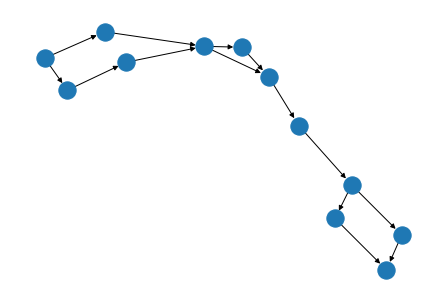

In [19]:
nx.draw(g)

In [20]:
g.nodes

NodeView((32299744, 32299788, 32299798, 32299800, 32299802, 32299814, 32299828, 32299922, 32299947, 32299977, 32300003, 32300014))

In [22]:
np.array(g.nodes[32299744]['features'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
import torch_geometric

In [28]:
d = torch_geometric.utils.from_networkx(g)

In [35]:
d.features.shape

torch.Size([12, 702])